In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [9]:
# Define the broken power law function
def broken_power_law(x, a, b, c, d, x_break):
    y = np.piecewise(x, [x < x_break, x >= x_break],
                     [lambda x: a * x**b, lambda x: c * x**d])
    return y

In [22]:
# Generate some sample data
x_data = np.linspace(1, 10, 100)
y_data = 2 * x_data**2.5 + 2 * x_data**(-0.8) + np.random.randn(100) * 10

In [23]:
# Perform least squares fitting
initial_guess = [1, 1, 1, -1, 5]  # Initial parameter guesses
fit_params, fit_covariance = curve_fit(broken_power_law, x_data, y_data, p0=initial_guess)

/tmp/ipykernel_6206/51276649.py:4: RuntimeWarning: overflow encountered in power
  [lambda x: a * x**b, lambda x: c * x**d])
/home/billee/miniconda3/envs/vri/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [24]:
# Extract the fitted parameters
a_fit, b_fit, c_fit, d_fit, x_break_fit = fit_params

In [25]:
# Generate the fitted curve
x_fit = np.linspace(1, 10, 100)
y_fit = broken_power_law(x_fit, a_fit, b_fit, c_fit, d_fit, x_break_fit)

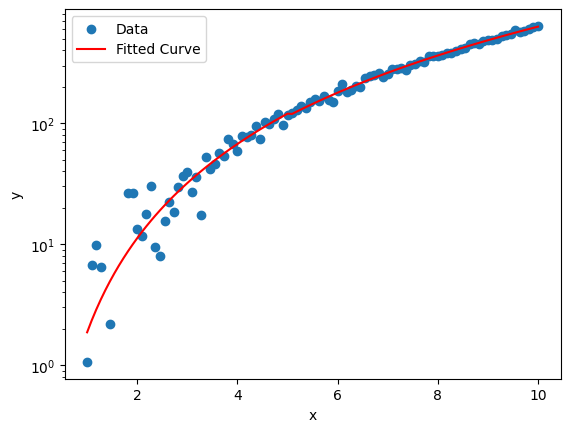

In [26]:
# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()